**Import libs, read csv**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import warnings

df=pd.read_csv("fil_data_movies_lessthan10k_removed.csv")

**Preprocess data**

In [2]:
#added column for decade
df['decade'] = (pd.DatetimeIndex(df['release_date']).year // 10) * 10

#drop years 1910,1920, because there are too little movies from those decades
df = df[df.decade != 1910]
df = df[df.decade != 1920]

df = df.drop(columns = ['backdrop_path','adult','release_date','homepage','imdb_id','original_title','overview','original_language','poster_path','tagline','production_companies','production_countries'], axis = 1)
             
df

,id,title,vote_average,vote_count,revenue,runtime,budget,popularity,genres,spoken_languages,decade
0,27205,Inception,8.364,34495,825532764,148,160000000,83.952,"Action, Science Fiction, Adventure","English, French, Japanese, Swahili",2010
1,157336,Interstellar,8.417,32571,701729206,169,165000000,140.241,"Adventure, Drama, Science Fiction",English,2010
2,155,The Dark Knight,8.512,30619,1004558444,152,185000000,130.643,"Drama, Action, Crime, Thriller","English, Mandarin",2000
3,19995,Avatar,7.573,29815,2923706026,162,237000000,79.932,"Action, Adventure, Fantasy, Science Fiction","English, Spanish",2000
4,24428,The Avengers,7.710,29166,1518815515,143,220000000,98.082,"Science Fiction, Action, Adventure","English, Hindi, Russian",2010
...,...,...,...,...,...,...,...,...,...,...,...
7437,23618,The Original Kings of Comedy,6.180,50,38251106,115,13000000,5.937,"Comedy, Documentary",English,2000
7438,131978,Suave Patria,5.800,50,3423685,92,2000000,4.786,Comedy,Spanish,2010
7439,32858,The Return of the Vampire,5.980,50,1090000,69,75000,6.752,Horror,English,1940
7440,38617,Off Limits,5.670,50,7242035,102,12000000,4.880,"Action, Crime, Drama, Mystery, Thriller",English,1980


**One-hot-encode genres**

In [3]:
s = df['genres'].str.split(', ').explode()
encoder = OneHotEncoder()
encoded = encoder.fit_transform(s.values[:, None])
one_hot_df = pd.DataFrame(encoded.toarray(), columns=np.ravel(encoder.categories_), dtype='int') \
                .groupby(s.index) \
                .sum()

final = pd.concat([df, one_hot_df], axis=1)

**Find 10 most produced genres of all time**
* Movies can have more than 1 genre

In [4]:
genre_counts = final.iloc[:, 11:].sum()
genre_percents = (genre_counts / len(df)) * 100
genre_percents=genre_percents.sort_values(ascending=False)
genre_percents[:10]

Drama              45.683502
Comedy             36.767677
Thriller           25.737374
Action             25.481481
Adventure          18.343434
Romance            18.101010
Crime              16.013468
Horror             11.851852
Science Fiction    11.434343
Family             10.491582
dtype: float64

**One-hot-encode spoken languages**

In [5]:
s = df['spoken_languages'].str.split(', ').explode()
encoder = OneHotEncoder()
encoded = encoder.fit_transform(s.values[:, None])
one_hot_df = pd.DataFrame(encoded.toarray(), columns=np.ravel(encoder.categories_), dtype='int') \
                .groupby(s.index) \
                .sum()

df_languages = pd.concat([df, one_hot_df], axis=1)

**Find 10 most appearing languages**
* Movies can have more than one spoken language

In [6]:
language_counts = df_languages.iloc[:,11:].sum()
language_percents = (language_counts / len(df_languages)) * 100
language_percents = language_percents.sort_values(ascending=False)
language_percents[:10]

English     88.821549
French      10.518519
Spanish      9.239057
German       5.454545
Italian      5.171717
Russian      4.417508
Japanese     3.313131
Mandarin     2.774411
Hindi        2.734007
Arabic       1.750842
dtype: float64

**Find average runtime per decade**

In [7]:
runtime = final.groupby('decade')['runtime']
runtime.mean() #movies are relatively the same length through time

decade
1930    102.312500
1940    105.777778
1950    113.702703
1960    128.098039
1970    112.375000
1980    106.264664
1990    109.436596
2000    108.185060
2010    110.131372
2020    114.210900
Name: runtime, dtype: float64

**Plot average runtime**

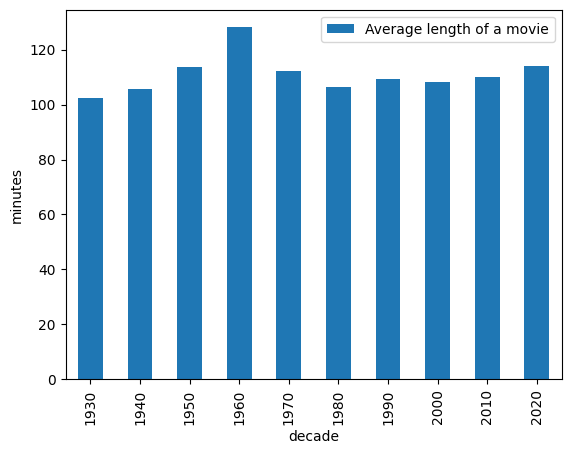

In [8]:
plot = runtime.mean().plot(kind = 'bar')
plot.set_ylabel('minutes')
plt.gca().legend(('Average length of a movie',''))
plt.show()

**Find average vote score by decade & plot it**

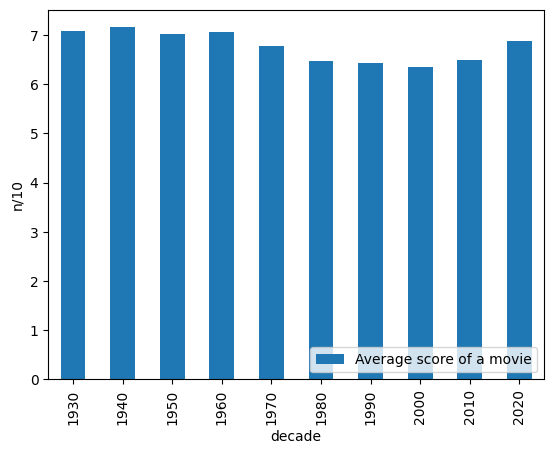

In [9]:
votes = final.groupby('decade')['vote_average']
votes.mean() #older movies have a higher score


plot = votes.mean().plot(kind = 'bar')
plot.set_ylabel('n/10')
plt.legend(('Average score of a movie',''), loc = 'lower right')
plt.show()

**Find percentage of movie genres per decade**

In [10]:
genres = ("Drama","Comedy","Thriller","Action","Adventure","Romance","Crime","Horror","Science Fiction","Family")
total_movies_by_decade = final.groupby('decade')['id'].count()

genres_by_decade_count = final.groupby('decade')[['id']].count()
for genre in genres:
    genre_movie_by_decade = final.groupby('decade')[genre].sum()
    genre_percent_by_decade = (genre_movie_by_decade / total_movies_by_decade)
    genres_by_decade_count[genre] = genre_percent_by_decade

genres_by_decade_count = genres_by_decade_count.drop('id', axis=1)

genres_by_decade_count

,Drama,Comedy,Thriller,Action,Adventure,Romance,Crime,Horror,Science Fiction,Family
decade,,,,,,,,,,
1930,0.541667,0.520833,0.000000,0.041667,0.145833,0.458333,0.125000,0.104167,0.062500,0.062500
1940,0.493827,0.197531,0.271605,0.037037,0.111111,0.370370,0.185185,0.049383,0.000000,0.098765
1950,0.531532,0.225225,0.153153,0.054054,0.126126,0.405405,0.171171,0.099099,0.144144,0.072072
1960,0.529412,0.287582,0.150327,0.111111,0.202614,0.254902,0.098039,0.065359,0.039216,0.058824
1970,0.455645,0.318548,0.270161,0.266129,0.205645,0.096774,0.185484,0.108871,0.165323,0.052419
1980,0.347639,0.403433,0.213162,0.244635,0.194564,0.167382,0.148784,0.187411,0.165951,0.078684
1990,0.464681,0.414468,0.265532,0.245957,0.155745,0.190638,0.200000,0.104681,0.127660,0.118298
2000,0.484819,0.390361,0.272771,0.247711,0.176386,0.215422,0.170120,0.107470,0.095422,0.117590
2010,0.467468,0.345213,0.263572,0.279735,0.186490,0.148777,0.140903,0.111894,0.106506,0.101119


**Get three most produced movie genres per decade**

In [11]:
#get top3 trending genres by movie production, the genres which are not in "genres" list do not change the result.
t1 = genres_by_decade_count.columns[genres_by_decade_count.values.argsort(1)[:, -1]]
t2 = genres_by_decade_count.columns[genres_by_decade_count.values.argsort(1)[:, -2]]
t3 = genres_by_decade_count.columns[genres_by_decade_count.values.argsort(1)[:, -3]]

genres_by_decade_count['top1'] = t1
genres_by_decade_count['top2'] = t2
genres_by_decade_count['top3'] = t3

top_genres_by_decade = genres_by_decade_count.drop(
    columns=['Drama', 'Comedy','Thriller', 'Action','Adventure', 'Romance','Crime', 'Horror','Science Fiction', 'Family'])

top_genres_by_decade

,top1,top2,top3
decade,,,
1930,Drama,Comedy,Romance
1940,Drama,Romance,Thriller
1950,Drama,Romance,Comedy
1960,Drama,Comedy,Romance
1970,Drama,Comedy,Thriller
1980,Comedy,Drama,Action
1990,Drama,Comedy,Thriller
2000,Drama,Comedy,Thriller
2010,Drama,Comedy,Action


**Calculate the success of a movie by:**
* finding the average profit of a decade (profit = revenue/budget)
    - profit will be a multiplier
* finding the average profit of a genre of a decade
        
* find the profit loss/win of the genre against the average

In [12]:
#get median revenue and budget by decade
median_revenue_by_decade = final.groupby('decade')['revenue'].median()
median_budget_by_decade = final.groupby('decade')['budget'].median()

#calculate average profit
profit_avg = pd.merge(median_revenue_by_decade,median_budget_by_decade, right_index = True, left_index = True)
#profit as relation of revenue against budget
profit_avg['profit_multiply_avg'] = profit_avg['revenue'] / profit_avg['budget']

#drop columns used for computation
profit_avg=profit_avg.drop("revenue",axis=1)
profit_avg=profit_avg.drop("budget",axis=1)

In [13]:
#get average profit per decade per genre
for genre in genres:
    new_df = final[final[genre] == 1]
    new_df.groupby('decade')['budget'].median()
    profit_avg[genre] = new_df.groupby('decade')['revenue'].median() / new_df.groupby('decade')['budget'].median()
    
profit_avg

,profit_multiply_avg,Drama,Comedy,Thriller,Action,Adventure,Romance,Crime,Horror,Science Fiction,Family
decade,,,,,,,,,,,
1930,3.455172,2.950969,3.244666,NaN,1.842626,1.600000,3.190447,7.140211,3.661972,5.079365,22.678343
1940,2.486081,3.856726,1.939433,2.234644,2.985294,1.435667,3.056926,1.917637,7.692308,NaN,16.945318
1950,3.843932,4.444444,3.043478,5.507474,1.690590,2.697016,3.500000,2.142857,9.298348,3.917396,9.044880
1960,3.285714,3.333333,4.016667,3.714286,7.550000,5.250000,4.432667,3.000000,14.535438,1.418969,9.350719
1970,6.201289,5.849474,6.857143,4.800000,4.984614,3.508176,7.134736,5.640458,16.666667,7.500000,3.862212
1980,2.060372,1.791667,2.804402,1.708017,1.558229,1.747962,2.368603,2.222030,2.666667,1.650973,2.710003
1990,1.187583,1.169789,1.462514,1.228679,1.348485,1.975196,1.583146,1.255263,1.384615,1.026036,1.309207
2000,1.591562,1.354182,1.563333,1.577339,1.458788,1.472148,1.494132,1.346868,2.315161,1.442349,2.183281
2010,1.933186,1.465559,2.222222,1.833511,1.983182,2.373601,1.871376,1.307730,3.897782,2.553191,2.060399


**Get genre names in text**

In [14]:
#drop columns used for computation
top_genres_by_decade = genres_by_decade_count.drop(
    columns=['Drama', 'Comedy','Thriller', 'Action','Adventure', 'Romance','Crime', 'Horror','Science Fiction', 'Family'])

top_genres_by_decade

,top1,top2,top3
decade,,,
1930,Drama,Comedy,Romance
1940,Drama,Romance,Thriller
1950,Drama,Romance,Comedy
1960,Drama,Comedy,Romance
1970,Drama,Comedy,Thriller
1980,Comedy,Drama,Action
1990,Drama,Comedy,Thriller
2000,Drama,Comedy,Thriller
2010,Drama,Comedy,Action


**Create a DataFrame for a scatterplot** 

In [15]:
result = pd.DataFrame()
warnings.filterwarnings("ignore")

for decade in top_genres_by_decade.index:
    for topN in top_genres_by_decade.columns:
        genre = top_genres_by_decade.loc[decade][topN]
        
        for colname in final:
            #print(colname)
            if colname==genre:
                #print(colname)
                partial = final[final['decade'] == decade][final[colname] == 1]        
                result = pd.concat([result,partial])
result=result.drop_duplicates()

result['profit'] = result['revenue']/result['budget']

#disregard about 1/6th of results for visibility's sake
result = result[result['profit']<5]

**Find average profit of a decade deducted from average profit of a genre.**
* This should reflect the success of a movie rather well, as the relation of budget/revenue is beyond inflation
* The ratings do not reflect the success of a movie, because an entertaining movie doesn't necessarily have to be good and vice versa.
* The amount of ratings does not reflect the success of a movie. Movies that are released mid 20th century and have many ratings have a cult following right now, but it tells us nothing about the movies' popularity at release.

In [16]:
B = top_genres_by_decade
profitpercentage=top_genres_by_decade

for topN in B.columns:
    dic = {1930:[],
        1940:[],
        1950:[],
        1960:[],
        1970:[],
        1980:[],
        1990:[],
        2000:[],
        2010:[],
        2020:[]}
    
    for decade in top_genres_by_decade.index:
        genre = top_genres_by_decade.loc[decade,topN]
        profit = (profit_avg.loc[decade, genre] - profit_avg.loc[decade, 'profit_multiply_avg']).round(4)
        #print(profit)
        dic[decade] = profit
    profitpercentage[topN+'_produced_profit'] = dic

profitpercentage

,top1,top2,top3,top1_produced_profit,top2_produced_profit,top3_produced_profit
decade,,,,,,
1930,Drama,Comedy,Romance,-0.5042,-0.2105,-0.2647
1940,Drama,Romance,Thriller,1.3706,0.5708,-0.2514
1950,Drama,Romance,Comedy,0.6005,-0.3439,-0.8005
1960,Drama,Comedy,Romance,0.0476,0.7310,1.1470
1970,Drama,Comedy,Thriller,-0.3518,0.6559,-1.4013
1980,Comedy,Drama,Action,0.7440,-0.2687,-0.5021
1990,Drama,Comedy,Thriller,-0.0178,0.2749,0.0411
2000,Drama,Comedy,Thriller,-0.2374,-0.0282,-0.0142
2010,Drama,Comedy,Action,-0.4676,0.2890,0.0500


**Plot graphs**

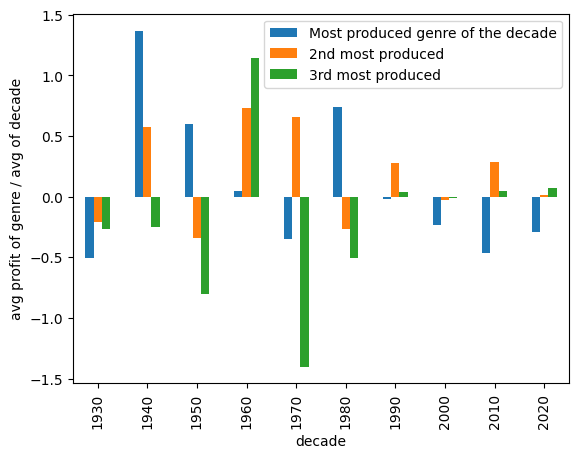

In [17]:
plot = profitpercentage.plot(kind = 'bar')
plot.set_ylabel('avg profit of genre / avg of decade')
plt.gca().legend(('Most produced genre of the decade','2nd most produced','3rd most produced'))
plt.show()

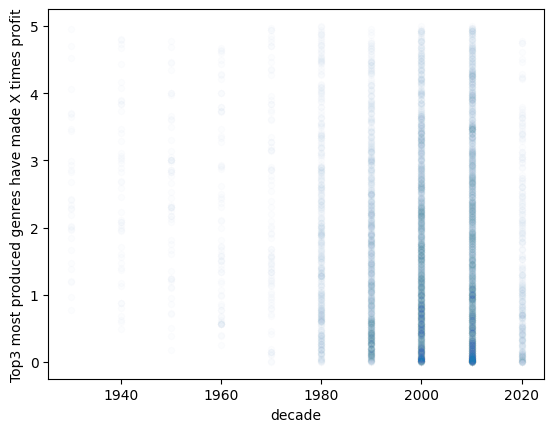

In [18]:
#values between 0 and 1 mean the movie has made less money than was invested into it
plot = result.plot(kind = 'scatter',x='decade',y='profit', alpha=0.01)
plot.set_ylabel('Top3 most produced genres have made X times profit')
plt.show()